In [1]:
import pandas as pd 
import numpy as np 
from textblob import TextBlob
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


import json, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import gensim


import random
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\pc\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\pc\AppData\Roaming\Python\Python38\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df = pd.read_excel('Resultados Touchpoint APP Personas del 1abr al 24 May.xlsx')
df.head()

,RecordedDate,Q2_NPS_GROUP,Q2,Q3,Q4,Q9,Q10,Q11,Q12,Q15,...,Q22_1,Q18,Q24_1,Q20,Nombre del cliente App,ID cuenta o Telefono App,email App,Segmento App,Modulo App,Accion
0,Fecha registrada,"En base a una escala de 0 a 10, donde 0 es la ...",Nps Numerico,Q3,"Cuéntanos, ¿qué otras razones?","Cuéntanos, ¿por qué el registro o ingreso a la...","Cuéntanos, ¿qué otras razones?","Cuéntanos, ¿por qué el funcionamiento de la ap...","Cuéntanos, ¿qué otras razones?",Nos gustaría conocer ¿cuál fue la circunstanci...,...,¿Lograste realizar tus consultas y transacciones?,¿Cuéntanos que no pudiste hacer?,¿Qué tan fácil es utilizar nuestra app Mi Claro?,¿Quieres contarnos algo más? Te invitamos a co...,Nombre del cliente App,ID cuenta o Telefono App,email App,Segmento App,Modulo App,Accion
1,2021-04-01 00:01:20.140000,Detractor,0,El funcionamiento de la app,NaN,NaN,NaN,Rapidez de la aplicación,NaN,J,...,\nNo\n,Pagar factura,NaN,NaN,Nicolas Vargas Lopez,14858685,vargas1nicolas@gmail.com,hog,hog_pagar_factura,Hogar_Pagar-Factura
2,2021-04-01 00:03:18.062000,Promotor,10,"El registro o ingreso a la app,El funcionamien...",NaN,"La facilidad para registrarte,La facilidad par...",NaN,La facilidad para navegar,NaN,NaN,...,\nSi\n,NaN,NaN,NaN,Fernando Moriones Tamayo,3017558039,moriones-tamayo@hotmail.com,pos,pos_pagar_factura,Pos_Pagar_Factura
3,2021-04-01 00:04:18.199000,Pasivo,8,El funcionamiento de la app,NaN,NaN,NaN,Por otras razones,No me resolvieron mis problemas de red y servi...,NaN,...,\nNo\n,No tengo resuelto el problema con mi conexión...,NaN,Necesito soporte técnico por favor gracias se ...,Bienvenido Usuario,94401155,maryalvarez1125@gmail.com,hog,hog_configuracion_soporte,Hogar_Configuracion_Soporte
4,2021-04-01 00:05:32.905000,Promotor,10,"El registro o ingreso a la app,El funcionamien...",NaN,"La facilidad para ingresar,La sencillez para r...",NaN,"La facilidad para descargar la app,La facilida...",NaN,NaN,...,\nSi\n,NaN,NaN,Es una APP que te ofrece la información que ne...,Fabio Andres Sanchez Cordoba,3113113488,fabiocordoba.77@gmail.com,pre,pre_elegidos,Pre_Elegidos


In [3]:
df = df.drop([0], axis=0)
df

,RecordedDate,Q2_NPS_GROUP,Q2,Q3,Q4,Q9,Q10,Q11,Q12,Q15,...,Q22_1,Q18,Q24_1,Q20,Nombre del cliente App,ID cuenta o Telefono App,email App,Segmento App,Modulo App,Accion
1,2021-04-01 00:01:20.140000,Detractor,0,El funcionamiento de la app,NaN,NaN,NaN,Rapidez de la aplicación,NaN,J,...,\nNo\n,Pagar factura,NaN,NaN,Nicolas Vargas Lopez,14858685,vargas1nicolas@gmail.com,hog,hog_pagar_factura,Hogar_Pagar-Factura
2,2021-04-01 00:03:18.062000,Promotor,10,"El registro o ingreso a la app,El funcionamien...",NaN,"La facilidad para registrarte,La facilidad par...",NaN,La facilidad para navegar,NaN,NaN,...,\nSi\n,NaN,NaN,NaN,Fernando Moriones Tamayo,3017558039,moriones-tamayo@hotmail.com,pos,pos_pagar_factura,Pos_Pagar_Factura
3,2021-04-01 00:04:18.199000,Pasivo,8,El funcionamiento de la app,NaN,NaN,NaN,Por otras razones,No me resolvieron mis problemas de red y servi...,NaN,...,\nNo\n,No tengo resuelto el problema con mi conexión...,NaN,Necesito soporte técnico por favor gracias se ...,Bienvenido Usuario,94401155,maryalvarez1125@gmail.com,hog,hog_configuracion_soporte,Hogar_Configuracion_Soporte
4,2021-04-01 00:05:32.905000,Promotor,10,"El registro o ingreso a la app,El funcionamien...",NaN,"La facilidad para ingresar,La sencillez para r...",NaN,"La facilidad para descargar la app,La facilida...",NaN,NaN,...,\nSi\n,NaN,NaN,Es una APP que te ofrece la información que ne...,Fabio Andres Sanchez Cordoba,3113113488,fabiocordoba.77@gmail.com,pre,pre_elegidos,Pre_Elegidos
5,2021-04-01 00:07:37.603000,Promotor,10,El funcionamiento de la app,NaN,NaN,NaN,Rapidez de la aplicación,NaN,NaN,...,\nSi\n,NaN,NaN,NaN,Wendy Jhoa Consuegra Arce,3104743971,wconsuegra135@gmail.com,pre,pre_consulta_saldo,Pre_Consulta_Saldos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73373,2021-05-24 23:49:30.146000,Pasivo,8,Otras razones,Tener que realizar la actualización de datos e...,NaN,NaN,NaN,NaN,NaN,...,\nSi\n,NaN,NaN,NaN,Luisa Fernanda Garcia Betancurt,3117894235,luisafebetan@hotmail.com,pre,pre_consulta_saldo,Pre_Consulta_Saldos
73374,2021-05-24 23:50:05.538000,Promotor,10,El funcionamiento de la app,NaN,NaN,NaN,Por otras razones,Pagos en linea,NaN,...,\nSi\n,NaN,NaN,NaN,Gustavo Ad Perez Fernandez,04677475,gapf.upci@gmail.com,hog,hog_pagar_factura,Hogar_Pagar-Factura
73375,2021-05-24 23:52:29.354000,Promotor,10,El funcionamiento de la app,NaN,NaN,NaN,La facilidad para navegar,NaN,NaN,...,\nSi\n,NaN,NaN,NaN,Felipe And Munoz Acero,22238513,blin181@gmail.com,hog,hog_pagar_factura,Hogar_Pagar-Factura
73376,2021-05-24 23:54:13.112000,Detractor,1,"El funcionamiento de la app,Otras razones",No se pueden hacer pagos con tarjeta,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Luis Felipe Palacio Ortiz,3158815782,felipepalacio28@gmail.com,pos,pos_pagar_factura,Pos_Pagar_Factura


In [4]:
df.Q2_NPS_GROUP.value_counts()

Promotor     39420
Detractor    22297
Pasivo       11660
Name: Q2_NPS_GROUP, dtype: int64

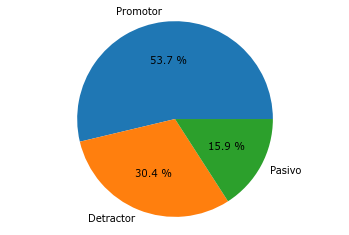

In [5]:
A = df.Q2_NPS_GROUP.value_counts()
indices = A.index
plt.pie(A, labels=indices, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [6]:
dfc = df[df['Q2_NPS_GROUP']!='Promotor']
dfc

,RecordedDate,Q2_NPS_GROUP,Q2,Q3,Q4,Q9,Q10,Q11,Q12,Q15,...,Q22_1,Q18,Q24_1,Q20,Nombre del cliente App,ID cuenta o Telefono App,email App,Segmento App,Modulo App,Accion
1,2021-04-01 00:01:20.140000,Detractor,0,El funcionamiento de la app,NaN,NaN,NaN,Rapidez de la aplicación,NaN,J,...,\nNo\n,Pagar factura,NaN,NaN,Nicolas Vargas Lopez,14858685,vargas1nicolas@gmail.com,hog,hog_pagar_factura,Hogar_Pagar-Factura
3,2021-04-01 00:04:18.199000,Pasivo,8,El funcionamiento de la app,NaN,NaN,NaN,Por otras razones,No me resolvieron mis problemas de red y servi...,NaN,...,\nNo\n,No tengo resuelto el problema con mi conexión...,NaN,Necesito soporte técnico por favor gracias se ...,Bienvenido Usuario,94401155,maryalvarez1125@gmail.com,hog,hog_configuracion_soporte,Hogar_Configuracion_Soporte
6,2021-04-01 00:07:49.260000,Pasivo,7,El funcionamiento de la app,NaN,NaN,NaN,Rapidez de la aplicación,NaN,NaN,...,\nNo\n,No me permite acceder a algunos iconos de la a...,NaN,NaN,Juan Felipe Moreno Bolivar,3226457505,jfmorenobolivar@gmail.com,pre,pre_detalle_plan,Pre_Detalle_Plan
9,2021-04-01 00:16:41.080000,Detractor,3,El funcionamiento de la app,NaN,NaN,NaN,Por otras razones,Quitan servicios que funcionan bien..como el p...,No aparece ahora,...,\nNo\n,Pasatiempo con cargo a mi factura,NaN,NaN,Jimmy Eduardo Hernandez Rodriguez,3183832623,jiminaji@hotmail.com,pre,pre_detalle_plan,Pre_Detalle_Plan
15,2021-04-01 00:23:29.357000,Pasivo,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Lina Maria Alvarez Padilla,3147929090,lina.alvarez7@gmail.com,pos,pos_pagar_factura,Pos_Pagar_Factura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73367,2021-05-24 23:33:29.841000,Pasivo,8,"El registro o ingreso a la app,El funcionamien...",NaN,"La facilidad para ingresar,La sencillez para r...",NaN,"La facilidad para descargar la app,La facilida...",NaN,NaN,...,\nSi\n,NaN,NaN,NaN,Haydee Agudelo Parada,3112234840,sergiorrozo@gmail.com,pre,pre_consulta_saldo,Pre_Consulta_Saldos
73370,2021-05-24 23:40:52.930000,Detractor,0,El registro o ingreso a la app,NaN,La facilidad para registrarte,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Jaime David Lopez Salas,NaN,jaimedavidlopezsala1@gmail.com,pre,pre_detalle_plan,Pre_Detalle_Plan
73372,2021-05-24 23:45:31.374000,Detractor,0,"El funcionamiento de la app,Otras razones",No se puede cambiar contraseña wifi,NaN,NaN,Rapidez de la aplicación,NaN,No cambia contraseña wifi,...,\nNo\n,Cambiar contraseña de wifi,NaN,NaN,Joseph Ram Sprockel Otalora,91699937,luisafrondon27@gmail.com,hog,hog_personaliza_wifi,Hogar_Personaliza_Wifi
73373,2021-05-24 23:49:30.146000,Pasivo,8,Otras razones,Tener que realizar la actualización de datos e...,NaN,NaN,NaN,NaN,NaN,...,\nSi\n,NaN,NaN,NaN,Luisa Fernanda Garcia Betancurt,3117894235,luisafebetan@hotmail.com,pre,pre_consulta_saldo,Pre_Consulta_Saldos


In [7]:
dfc = dfc[['Q4', 'Q12', 'Q15', 'Q18', 'Q20']]
dfc

,Q4,Q12,Q15,Q18,Q20
1,NaN,NaN,J,Pagar factura,NaN
3,NaN,No me resolvieron mis problemas de red y servi...,NaN,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...
6,NaN,NaN,NaN,No me permite acceder a algunos iconos de la a...,NaN
9,NaN,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,NaN
15,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
73367,NaN,NaN,NaN,NaN,NaN
73370,NaN,NaN,NaN,NaN,NaN
73372,No se puede cambiar contraseña wifi,NaN,No cambia contraseña wifi,Cambiar contraseña de wifi,NaN
73373,Tener que realizar la actualización de datos e...,NaN,NaN,NaN,NaN


In [8]:
dfc = dfc.fillna('')
dfc

,Q4,Q12,Q15,Q18,Q20
1,,,J,Pagar factura,
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...
6,,,,No me permite acceder a algunos iconos de la a...,
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,
15,,,,,
...,...,...,...,...,...
73367,,,,,
73370,,,,,
73372,No se puede cambiar contraseña wifi,,No cambia contraseña wifi,Cambiar contraseña de wifi,
73373,Tener que realizar la actualización de datos e...,,,,


In [9]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [10]:
dfc["Tokens_Q4"] =  dfc.Q4.apply(limpiar_texto)
dfc["Tokens_Q12"] =  dfc.Q12.apply(limpiar_texto)
dfc["Tokens_Q15"] =  dfc.Q15.apply(limpiar_texto)
dfc["Tokens_Q18"] =  dfc.Q18.apply(limpiar_texto)
dfc["Tokens_Q20"] =  dfc.Q20.apply(limpiar_texto)
dfc

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20
1,,,J,Pagar factura,,,,j,pagar factura,
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,,no me resolvieron mis problemas de red servicio,,no tengo resuelto el problema con mi conexión ...,necesito soporte técnico por favor gracias se ...
6,,,,No me permite acceder a algunos iconos de la a...,,,,,no me permite acceder algunos iconos de la apl...,
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,,quitan servicios que funcionan bien como el pa...,no aparece ahora,pasatiempo con cargo mi factura,
15,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
73367,,,,,,,,,,
73370,,,,,,,,,,
73372,No se puede cambiar contraseña wifi,,No cambia contraseña wifi,Cambiar contraseña de wifi,,no se puede cambiar contraseña wifi,,no cambia contraseña wifi,cambiar contraseña de wifi,
73373,Tener que realizar la actualización de datos e...,,,,,tener que realizar la actualización de datos e...,,,,


In [11]:
tokenizer = ToktokTokenizer() 
dfc["Tokens_Q4"] = dfc.Tokens_Q4.apply(tokenizer.tokenize)
dfc["Tokens_Q12"] = dfc.Tokens_Q12.apply(tokenizer.tokenize)
dfc["Tokens_Q15"] = dfc.Tokens_Q15.apply(tokenizer.tokenize)
dfc["Tokens_Q18"] = dfc.Tokens_Q18.apply(tokenizer.tokenize)
dfc["Tokens_Q20"] = dfc.Tokens_Q20.apply(tokenizer.tokenize)
dfc.head()

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20
1,,,J,Pagar factura,,[],[],[j],"[pagar, factura]",[]
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,[],"[no, me, resolvieron, mis, problemas, de, red,...",[],"[no, tengo, resuelto, el, problema, con, mi, c...","[necesito, soporte, técnico, por, favor, graci..."
6,,,,No me permite acceder a algunos iconos de la a...,,[],[],[],"[no, me, permite, acceder, algunos, iconos, de...",[]
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,[],"[quitan, servicios, que, funcionan, bien, como...","[no, aparece, ahora]","[pasatiempo, con, cargo, mi, factura]",[]
15,,,,,,[],[],[],[],[]


In [12]:
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words("spanish"))

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

dfc["Tokens_Q4"] = dfc.Tokens_Q4.apply(filtrar_stopword_digitos)
dfc["Tokens_Q12"] = dfc.Tokens_Q12.apply(filtrar_stopword_digitos)
dfc["Tokens_Q15"] = dfc.Tokens_Q15.apply(filtrar_stopword_digitos)
dfc["Tokens_Q18"] = dfc.Tokens_Q18.apply(filtrar_stopword_digitos)
dfc["Tokens_Q20"] = dfc.Tokens_Q20.apply(filtrar_stopword_digitos)
dfc.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20
1,,,J,Pagar factura,,[],[],[j],"[pagar, factura]",[]
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,[],"[resolvieron, problemas, red, servicio]",[],"[resuelto, problema, conexión, internet, falla...","[necesito, soporte, técnico, favor, gracias, p..."
6,,,,No me permite acceder a algunos iconos de la a...,,[],[],[],"[permite, acceder, iconos, aplicación]",[]
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,[],"[quitan, servicios, funcionan, bien, pasatiemp...","[aparece, ahora]","[pasatiempo, cargo, factura]",[]
15,,,,,,[],[],[],[],[]


In [13]:
stemmer = SnowballStemmer("spanish")

def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

dfc["Tokens_Q4"] = dfc.Tokens_Q4.apply(stem_palabras)
dfc["Tokens_Q12"] = dfc.Tokens_Q12.apply(stem_palabras)
dfc["Tokens_Q15"] = dfc.Tokens_Q15.apply(stem_palabras)
dfc["Tokens_Q18"] = dfc.Tokens_Q18.apply(stem_palabras)
dfc["Tokens_Q20"] = dfc.Tokens_Q20.apply(stem_palabras)
dfc.head()

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20
1,,,J,Pagar factura,,[],[],[j],"[pag, factur]",[]
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,[],"[resolv, problem, red, servici]",[],"[resuelt, problem, conexion, internet, fall, c...","[necesit, soport, tecnic, favor, graci, pued, ..."
6,,,,No me permite acceder a algunos iconos de la a...,,[],[],[],"[permit, acced, icon, aplic]",[]
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,[],"[quit, servici, funcion, bien, pasatiemp, carg...","[aparec, ahor]","[pasatiemp, carg, factur]",[]
15,,,,,,[],[],[],[],[]


In [14]:
list_Q4 = dfc["Tokens_Q4"].tolist()
list_Q12 = dfc["Tokens_Q12"].tolist()
list_Q15 = dfc["Tokens_Q15"].tolist()
list_Q18 = dfc["Tokens_Q18"].tolist()
list_Q20 = dfc["Tokens_Q20"].tolist()

list_Q4 = [x for x in list_Q4 if x!= []]
list_Q12 = [x for x in list_Q12 if x!= []]
list_Q15 = [x for x in list_Q15 if x!= []]
list_Q18 = [x for x in list_Q18 if x!= []]
list_Q20 = [x for x in list_Q20 if x!= []]

In [15]:
list_Q15

[['j'],
 ['aparec', 'ahor'],
 ['asoci', 'cuent'],
 ['lent', 'plataform', 'bloque'],
 ['quit', 'simul', 'financi'],
 ['funcion', 'hag', 'segund', 'intent'],
 ['clar', 'gener', 'dobl', 'factur', 'sy', 'entiend', 'porqh'],
 ['necesit',
  'cambi',
  'fech',
  'cort',
  'lleg',
  'recordatori',
  'deb',
  'pag',
  'principi',
  'mes',
  'si',
  'mor',
  'internet',
  'fall',
  'mu'],
 ['pud', 'registr', 'nuev', 'imei'],
 ['cae', 'pued', 'valid'],
 ['funcion', 'bien'],
 ['vec', 'lent', 'inici', 'qued', 'carg'],
 ['lent'],
 ['si', 'clar'],
 ['buen'],
 ['pud', 'hac', 'transaccion'],
 ['dej', 'hac', 'pag', 'factur', 'pse'],
 ['numer', 'celul', 'aparec', 'consult', 'inform', 'product'],
 ['cobr', 'transaccion'],
 ['canson', 'incumpl', 'promet', 'va', 'adquir', 'servici'],
 ['dic', 'dispon', 'moment'],
 ['cobr', 'deb', 'hac'],
 ['pued', 'realiz', 'pag'],
 ['demor', 'inici', 'app'],
 ['seleccion', 'opcion', 'sac', 'aplic'],
 ['dej', 'pag', 'factur'],
 ['part',
  'mal',
  'funsion',
  'app',
  'ser

In [16]:
Lista_general = list_Q4+list_Q12+list_Q15+list_Q18
print(Lista_general)

[['sab', 'canal', 'inclu', 'plan'], ['quit', 'simul', 'financi'], ['normal'], ['solicit', 'diferent', 'medi', 'cambi', 'fech', 'cort', 'factur', 'clar', 'hog', 'sid', 'posibl', 'internet', 'intermitent'], ['pesim'], ['facturacion'], ['cobr', 'realiz', 'transaccion', 'pse'], ['intens', 'cuant', 'cobr'], ['rob', 'gent'], ['canal', 'telefon', 'mal', 'atencion'], ['conveni', 'descuent'], ['uso', 'cupon', 'promocion'], ['quit', 'ton', 'llam', 'gratis', 'aplic'], ['servici', 'tecnic'], ['facil', 'naveg'], ['señal', 'ningun', 'lad', 'factur', 'cobr', 'complet'], ['siempr', 'voy', 'realiz', 'pag', 'app', 'aparec', 'valor'], ['dat', 'lent', 'supuest', 'gb'], ['proces', 'cancel'], ['pud', 'realiz', 'tare', 'dispon', 'hac', 'dic', 'intent', 'conexion', 'moment'], ['acept', 'pag'], ['internet', 'lent'], ['canal', 'tv', 'dese', 'si', 'toc', 'ver', 'ret', 'toc', 'pag', 'much', 'public', 'clar'], ['servici', 'clar', 'music', 'vide', 'intermitent'], ['proces', 'simpl'], ['internet', 'funcion'], ['fina

In [17]:
bigram = gensim.models.Phrases(Lista_general, min_count=5, threshold=10) 
trigram = gensim.models.Phrases(bigram[Lista_general], threshold=10)  


bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[Lista_general[15]]])

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

['señal', 'ningun_lad', 'factur', 'cobr', 'complet']


In [18]:
data_words_bigrams = make_bigrams(Lista_general)

In [19]:
diccionario = Dictionary(data_words_bigrams)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 6463


In [20]:
diccionario.filter_extremes(no_below=2, no_above = 0.9)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 2932


In [21]:
corpus = [diccionario.doc2bow(noticia) for noticia in data_words_bigrams]
# Mostramos el BOW de una noticia
print(corpus[6])

[(20, 1), (21, 1), (22, 1), (23, 1)]


In [39]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=9, random_state=35, 
               chunksize=1000, iterations=200, passes=40, alpha='auto')

In [40]:
topicos = lda.print_topics(num_words=5, num_topics=20)
for topico in topicos:
    print(topico)

(0, '0.157*"wifi" + 0.114*"cambi_clav" + 0.073*"cambi" + 0.060*"cambi_contraseñ" + 0.060*"dat"')
(1, '0.088*"ingres" + 0.082*"carg" + 0.061*"registr" + 0.054*"numer" + 0.036*"qued"')
(2, '0.067*"dic" + 0.064*"nunc" + 0.061*"siempr" + 0.049*"problem" + 0.035*"arregl"')
(3, '0.089*"plan" + 0.051*"si" + 0.049*"cancel" + 0.038*"solucion_problem" + 0.036*"llam"')
(4, '0.112*"fall" + 0.090*"solucion" + 0.060*"tecnic" + 0.027*"tv" + 0.025*"asesor"')
(5, '0.285*"pag" + 0.137*"factur" + 0.055*"pud" + 0.049*"dej" + 0.044*"hac"')
(6, '0.242*"servici" + 0.213*"internet" + 0.108*"funcion" + 0.095*"mal" + 0.035*"pesim"')
(7, '0.036*"present" + 0.034*"cae" + 0.034*"mir" + 0.030*"logr" + 0.028*"error"')
(8, '0.078*"lent" + 0.077*"aplic" + 0.072*"ver" + 0.072*"hog" + 0.064*"consult"')


In [41]:
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, diccionario, sort_topics=False)
pyLDAvis.display(lda_display)

In [59]:
lda_5 = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=5, random_state=35, 
               chunksize=1000, iterations=200, passes=40, alpha='auto')

In [60]:
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(lda_5, corpus, diccionario, sort_topics=False)
pyLDAvis.display(lda_display)

In [22]:
lda_4 = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=4, random_state=35, 
               chunksize=1000, iterations=200, passes=40, alpha='auto')

In [23]:
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(lda_4, corpus, diccionario, sort_topics=False)
pyLDAvis.display(lda_display)

In [24]:
pyLDAvis.save_html(lda_display, 'lda_General_4_V2.html')

In [58]:
dfc2 = df[df['Q2_NPS_GROUP']!='Promotor']
dfc2 = dfc.fillna('')
dfc2

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20
1,,,J,Pagar factura,,[],[],[j],"[pag, factur]",[]
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,[],"[resolv, problem, red, servici]",[],"[resuelt, problem, conexion, internet, fall, c...","[necesit, soport, tecnic, favor, graci, pued, ..."
6,,,,No me permite acceder a algunos iconos de la a...,,[],[],[],"[permit, acced, icon, aplic]",[]
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,[],"[quit, servici, funcion, bien, pasatiemp, carg...","[aparec, ahor]","[pasatiemp, carg, factur]",[]
15,,,,,,[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...
73367,,,,,,[],[],[],[],[]
73370,,,,,,[],[],[],[],[]
73372,No se puede cambiar contraseña wifi,,No cambia contraseña wifi,Cambiar contraseña de wifi,,"[pued, cambi, contraseñ, wifi]",[],"[cambi, contraseñ, wifi]","[cambi, contraseñ, wifi]",[]
73373,Tener que realizar la actualización de datos e...,,,,,"[ten, realiz, actualiz, dat, tiemp]",[],[],[],[]


In [59]:
def Limpiar_Caracter(texto):
    if len(texto) == 1 or texto == ',':
        texto = ''
    else:
        texto = texto
    return texto

In [60]:
dfc2["Tokens_Q4"] =  dfc2.Q4.apply(limpiar_texto)
dfc2["Tokens_Q12"] =  dfc2.Q12.apply(limpiar_texto)
dfc2["Tokens_Q15"] =  dfc2.Q15.apply(limpiar_texto)
dfc2["Tokens_Q18"] =  dfc2.Q18.apply(limpiar_texto)
dfc2["Tokens_Q20"] =  dfc2.Q20.apply(limpiar_texto)

dfc2["Tokens_Q4"] =  dfc2.Q4.apply(Limpiar_Caracter)
dfc2["Tokens_Q12"] =  dfc2.Q12.apply(Limpiar_Caracter)
dfc2["Tokens_Q15"] =  dfc2.Q15.apply(Limpiar_Caracter)
dfc2["Tokens_Q18"] =  dfc2.Q18.apply(Limpiar_Caracter)
dfc2["Tokens_Q20"] =  dfc2.Q20.apply(Limpiar_Caracter)

dfc2

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20
1,,,J,Pagar factura,,,,,Pagar factura,
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...
6,,,,No me permite acceder a algunos iconos de la a...,,,,,No me permite acceder a algunos iconos de la a...,
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,
15,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
73367,,,,,,,,,,
73370,,,,,,,,,,
73372,No se puede cambiar contraseña wifi,,No cambia contraseña wifi,Cambiar contraseña de wifi,,No se puede cambiar contraseña wifi,,No cambia contraseña wifi,Cambiar contraseña de wifi,
73373,Tener que realizar la actualización de datos e...,,,,,Tener que realizar la actualización de datos e...,,,,


In [61]:
dfc2['Opinion'] = ''

for i in dfc2.index:
    dfc2.loc[i,'Opinion'] = str(dfc2.loc[i,'Tokens_Q12']) + " " + str(dfc2.loc[i,'Tokens_Q15']) + " " + str(dfc2.loc[i,'Tokens_Q18']) 
    
dfc2

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20,Opinion
1,,,J,Pagar factura,,,,,Pagar factura,,Pagar factura
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,No me resolvieron mis problemas de red y servi...
6,,,,No me permite acceder a algunos iconos de la a...,,,,,No me permite acceder a algunos iconos de la a...,,No me permite acceder a algunos iconos de la...
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,Quitan servicios que funcionan bien..como el p...
15,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
73367,,,,,,,,,,,
73370,,,,,,,,,,,
73372,No se puede cambiar contraseña wifi,,No cambia contraseña wifi,Cambiar contraseña de wifi,,No se puede cambiar contraseña wifi,,No cambia contraseña wifi,Cambiar contraseña de wifi,,No cambia contraseña wifi Cambiar contraseña ...
73373,Tener que realizar la actualización de datos e...,,,,,Tener que realizar la actualización de datos e...,,,,,


In [62]:
dfc2['Opinion'] = dfc2['Opinion'].apply(tokenizer.tokenize)
dfc2['Opinion'] = dfc2['Opinion'].apply(filtrar_stopword_digitos)
dfc2['Opinion'] = dfc2['Opinion'].apply(stem_palabras)
dfc2['Opinion'] 

1                                            [pag, factur]
3        [no, resolv, problem, red, servici, no, resuel...
6                         [no, permit, acced, icon, aplic]
9        [quit, servici, funcion, bien, .., pasatiemp, ...
15                                                      []
                               ...                        
73367                                                   []
73370                                                   []
73372    [no, cambi, contraseñ, wifi, cambi, contraseñ,...
73373                                                   []
73376                                                   []
Name: Opinion, Length: 33957, dtype: object

In [63]:
for i in dfc2.index:
    
    if dfc2.loc[i,'Opinion']==[]:
        dfc2.drop([i], inplace=True)

dfc2

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20,Opinion
1,,,J,Pagar factura,,,,,Pagar factura,,"[pag, factur]"
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,"[no, resolv, problem, red, servici, no, resuel..."
6,,,,No me permite acceder a algunos iconos de la a...,,,,,No me permite acceder a algunos iconos de la a...,,"[no, permit, acced, icon, aplic]"
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,"[quit, servici, funcion, bien, .., pasatiemp, ..."
24,,,Asociar cuenta,Asociar cuenta\n,,,,Asociar cuenta,Asociar cuenta\n,,"[asoci, cuent, asoci, cuent]"
...,...,...,...,...,...,...,...,...,...,...,...
73353,,,No e podido pagar la factura,Pagar la factura,,,,No e podido pagar la factura,Pagar la factura,,"[no, pod, pag, factur, pag, factur]"
73357,Jamás funciona la app siempre hay fallas en el...,No sirve jamas,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,Jamás funciona la app siempre hay fallas en el...,No sirve jamas,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,"[no, sirv, jam, el, servici, pesim, ,, compr, ..."
73365,,Deberia existir una opcion de reiniciar el mod...,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,,Deberia existir una opcion de reiniciar el mod...,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,"[deberi, exist, opcion, reinici, modem, app, n..."
73366,,No me da solución a mis requerimientos,Caída de internet,Reportar la caída de mi internet,,,No me da solución a mis requerimientos,Caída de internet,Reportar la caída de mi internet,,"[no, da, solucion, requer, caid, internet, rep..."


In [64]:
diccionario.doc2bow(dfc2.loc[1,'Opinion'])

[(11, 1), (49, 1)]

In [65]:
dfc2['Tópico'] = ""
for i in dfc2.index:
    try:
        
        bow_comentario = diccionario.doc2bow(dfc2.loc[i,'Opinion'])
        distribucion_noticia = lda_4[bow_comentario]

        dist_contrib = [topico[1] for topico in lda_4[bow_comentario]]

        if (dist_contrib[0] > dist_contrib[1]) & (dist_contrib[0] > dist_contrib[2]) & (dist_contrib[0] > dist_contrib[3]):
            dfc2.loc[i,'Tópico'] = 1
        elif (dist_contrib[1] > dist_contrib[0]) & (dist_contrib[1] > dist_contrib[2]) & (dist_contrib[1] > dist_contrib[3]):
            dfc2.loc[i,'Tópico'] = 2
        elif (dist_contrib[2] > dist_contrib[0]) & (dist_contrib[2] > dist_contrib[1]) & (dist_contrib[2] > dist_contrib[3]):
            dfc2.loc[i,'Tópico'] = 3
        elif (dist_contrib[3] > dist_contrib[0]) & (dist_contrib[3] > dist_contrib[1]) & (dist_contrib[3] > dist_contrib[2]):
            dfc2.loc[i,'Tópico'] = 4
        
    except:
        print('No')

In [66]:
dfc2.Tópico.value_counts()

3    7400
1    4259
2    2371
4    1158
Name: Tópico, dtype: int64

In [67]:
dfc2

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20,Opinion,Tópico
1,,,J,Pagar factura,,,,,Pagar factura,,"[pag, factur]",3
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,"[no, resolv, problem, red, servici, no, resuel...",1
6,,,,No me permite acceder a algunos iconos de la a...,,,,,No me permite acceder a algunos iconos de la a...,,"[no, permit, acced, icon, aplic]",3
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,"[quit, servici, funcion, bien, .., pasatiemp, ...",2
24,,,Asociar cuenta,Asociar cuenta\n,,,,Asociar cuenta,Asociar cuenta\n,,"[asoci, cuent, asoci, cuent]",3
...,...,...,...,...,...,...,...,...,...,...,...,...
73353,,,No e podido pagar la factura,Pagar la factura,,,,No e podido pagar la factura,Pagar la factura,,"[no, pod, pag, factur, pag, factur]",3
73357,Jamás funciona la app siempre hay fallas en el...,No sirve jamas,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,Jamás funciona la app siempre hay fallas en el...,No sirve jamas,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,"[no, sirv, jam, el, servici, pesim, ,, compr, ...",1
73365,,Deberia existir una opcion de reiniciar el mod...,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,,Deberia existir una opcion de reiniciar el mod...,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,"[deberi, exist, opcion, reinici, modem, app, n...",1
73366,,No me da solución a mis requerimientos,Caída de internet,Reportar la caída de mi internet,,,No me da solución a mis requerimientos,Caída de internet,Reportar la caída de mi internet,,"[no, da, solucion, requer, caid, internet, rep...",1


In [68]:
dfc2['RecordedDate'] = df['RecordedDate']
dfc2['Q2_NPS_GROUP'] = df['Q2_NPS_GROUP']
dfc2['Q2'] = df['Q2']
dfc2['Q3'] = df['Q3']
dfc2['Q9'] = df['Q9']
dfc2['Q11'] = df['Q11']
dfc2['Nombre del cliente App'] = df['Nombre del cliente App']
dfc2['ID cuenta o Telefono App'] = df['ID cuenta o Telefono App']
dfc2['email App'] = df['email App']
dfc2['Segmento App'] = df['Segmento App']
dfc2['Modulo App'] = df['Modulo App']

In [69]:
dfc2

,Q4,Q12,Q15,Q18,Q20,Tokens_Q4,Tokens_Q12,Tokens_Q15,Tokens_Q18,Tokens_Q20,...,Q2_NPS_GROUP,Q2,Q3,Q9,Q11,Nombre del cliente App,ID cuenta o Telefono App,email App,Segmento App,Modulo App
1,,,J,Pagar factura,,,,,Pagar factura,,...,Detractor,0,El funcionamiento de la app,NaN,Rapidez de la aplicación,Nicolas Vargas Lopez,14858685,vargas1nicolas@gmail.com,hog,hog_pagar_factura
3,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,,No me resolvieron mis problemas de red y servi...,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,...,Pasivo,8,El funcionamiento de la app,NaN,Por otras razones,Bienvenido Usuario,94401155,maryalvarez1125@gmail.com,hog,hog_configuracion_soporte
6,,,,No me permite acceder a algunos iconos de la a...,,,,,No me permite acceder a algunos iconos de la a...,,...,Pasivo,7,El funcionamiento de la app,NaN,Rapidez de la aplicación,Juan Felipe Moreno Bolivar,3226457505,jfmorenobolivar@gmail.com,pre,pre_detalle_plan
9,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,,Quitan servicios que funcionan bien..como el p...,No aparece ahora,Pasatiempo con cargo a mi factura,,...,Detractor,3,El funcionamiento de la app,NaN,Por otras razones,Jimmy Eduardo Hernandez Rodriguez,3183832623,jiminaji@hotmail.com,pre,pre_detalle_plan
24,,,Asociar cuenta,Asociar cuenta\n,,,,Asociar cuenta,Asociar cuenta\n,,...,Detractor,0,El registro o ingreso a la app,La facilidad para registrarte,NaN,Raul Alberto Ceron Salinas,NaN,raulceron1@gmail.com,pre,pre_detalle_plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73353,,,No e podido pagar la factura,Pagar la factura,,,,No e podido pagar la factura,Pagar la factura,,...,Detractor,2,El funcionamiento de la app,NaN,Rapidez de la aplicación,Jose Rigoberto Ocampo Murcia,35253661,r.o.m2964@hotmail.com,hog,hog_pagar_factura
73357,Jamás funciona la app siempre hay fallas en el...,No sirve jamas,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,Jamás funciona la app siempre hay fallas en el...,No sirve jamas,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,...,Detractor,0,"El funcionamiento de la app,Otras razones",NaN,Por otras razones,Maria Alej Salinas Gonzalez,48308772,alejita5160@gmail.com,hog,hog_personaliza_wifi
73365,,Deberia existir una opcion de reiniciar el mod...,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,,Deberia existir una opcion de reiniciar el mod...,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,...,Detractor,1,El funcionamiento de la app,NaN,Por otras razones,Marggi Ramirez Rodriguez,69557133,marggiramirez4@hotmail.com,hog,hog_configuracion_soporte
73366,,No me da solución a mis requerimientos,Caída de internet,Reportar la caída de mi internet,,,No me da solución a mis requerimientos,Caída de internet,Reportar la caída de mi internet,,...,Detractor,1,El funcionamiento de la app,NaN,Por otras razones,Katherin Giuliana Pascuas Gonzalez,11577189,cathe.rojo@hotmail.com,hog,hog_configuracion_soporte


In [70]:
lista_ordenada = ['RecordedDate', 'Q2_NPS_GROUP', 'Q2', 'Q3', 'Q4', 'Q9', 'Q12', 'Q11', 'Q15', 'Q18', 'Q20', 'Opinion', 'Tópico', 'Segmento App', 'Modulo App', 'Nombre del cliente App', 'ID cuenta o Telefono App', 'email App', 'Segmento App']
dfc2 = dfc2[lista_ordenada]
dfc2

,RecordedDate,Q2_NPS_GROUP,Q2,Q3,Q4,Q9,Q12,Q11,Q15,Q18,Q20,Opinion,Tópico,Segmento App,Modulo App,Nombre del cliente App,ID cuenta o Telefono App,email App,Segmento App
1,2021-04-01 00:01:20.140000,Detractor,0,El funcionamiento de la app,,NaN,,Rapidez de la aplicación,J,Pagar factura,,"[pag, factur]",3,hog,hog_pagar_factura,Nicolas Vargas Lopez,14858685,vargas1nicolas@gmail.com,hog
3,2021-04-01 00:04:18.199000,Pasivo,8,El funcionamiento de la app,,NaN,No me resolvieron mis problemas de red y servi...,Por otras razones,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,"[no, resolv, problem, red, servici, no, resuel...",1,hog,hog_configuracion_soporte,Bienvenido Usuario,94401155,maryalvarez1125@gmail.com,hog
6,2021-04-01 00:07:49.260000,Pasivo,7,El funcionamiento de la app,,NaN,,Rapidez de la aplicación,,No me permite acceder a algunos iconos de la a...,,"[no, permit, acced, icon, aplic]",3,pre,pre_detalle_plan,Juan Felipe Moreno Bolivar,3226457505,jfmorenobolivar@gmail.com,pre
9,2021-04-01 00:16:41.080000,Detractor,3,El funcionamiento de la app,,NaN,Quitan servicios que funcionan bien..como el p...,Por otras razones,No aparece ahora,Pasatiempo con cargo a mi factura,,"[quit, servici, funcion, bien, .., pasatiemp, ...",2,pre,pre_detalle_plan,Jimmy Eduardo Hernandez Rodriguez,3183832623,jiminaji@hotmail.com,pre
24,2021-04-01 00:40:49.408000,Detractor,0,El registro o ingreso a la app,,La facilidad para registrarte,,NaN,Asociar cuenta,Asociar cuenta\n,,"[asoci, cuent, asoci, cuent]",3,pre,pre_detalle_plan,Raul Alberto Ceron Salinas,NaN,raulceron1@gmail.com,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73353,2021-05-24 23:12:15.411000,Detractor,2,El funcionamiento de la app,,NaN,,Rapidez de la aplicación,No e podido pagar la factura,Pagar la factura,,"[no, pod, pag, factur, pag, factur]",3,hog,hog_pagar_factura,Jose Rigoberto Ocampo Murcia,35253661,r.o.m2964@hotmail.com,hog
73357,2021-05-24 23:19:39.234000,Detractor,0,"El funcionamiento de la app,Otras razones",Jamás funciona la app siempre hay fallas en el...,NaN,No sirve jamas,Por otras razones,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,"[no, sirv, jam, el, servici, pesim, ,, compr, ...",1,hog,hog_personaliza_wifi,Maria Alej Salinas Gonzalez,48308772,alejita5160@gmail.com,hog
73365,2021-05-24 23:29:19.915000,Detractor,1,El funcionamiento de la app,,NaN,Deberia existir una opcion de reiniciar el mod...,Por otras razones,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,"[deberi, exist, opcion, reinici, modem, app, n...",1,hog,hog_configuracion_soporte,Marggi Ramirez Rodriguez,69557133,marggiramirez4@hotmail.com,hog
73366,2021-05-24 23:30:55.338000,Detractor,1,El funcionamiento de la app,,NaN,No me da solución a mis requerimientos,Por otras razones,Caída de internet,Reportar la caída de mi internet,,"[no, da, solucion, requer, caid, internet, rep...",1,hog,hog_configuracion_soporte,Katherin Giuliana Pascuas Gonzalez,11577189,cathe.rojo@hotmail.com,hog


In [71]:
dfc2['Tema'] = dfc2['Tópico'] 

In [72]:
dfc2

,RecordedDate,Q2_NPS_GROUP,Q2,Q3,Q4,Q9,Q12,Q11,Q15,Q18,Q20,Opinion,Tópico,Segmento App,Modulo App,Nombre del cliente App,ID cuenta o Telefono App,email App,Segmento App,Tema
1,2021-04-01 00:01:20.140000,Detractor,0,El funcionamiento de la app,,NaN,,Rapidez de la aplicación,J,Pagar factura,,"[pag, factur]",3,hog,hog_pagar_factura,Nicolas Vargas Lopez,14858685,vargas1nicolas@gmail.com,hog,3
3,2021-04-01 00:04:18.199000,Pasivo,8,El funcionamiento de la app,,NaN,No me resolvieron mis problemas de red y servi...,Por otras razones,,No tengo resuelto el problema con mi conexión...,Necesito soporte técnico por favor gracias se ...,"[no, resolv, problem, red, servici, no, resuel...",1,hog,hog_configuracion_soporte,Bienvenido Usuario,94401155,maryalvarez1125@gmail.com,hog,1
6,2021-04-01 00:07:49.260000,Pasivo,7,El funcionamiento de la app,,NaN,,Rapidez de la aplicación,,No me permite acceder a algunos iconos de la a...,,"[no, permit, acced, icon, aplic]",3,pre,pre_detalle_plan,Juan Felipe Moreno Bolivar,3226457505,jfmorenobolivar@gmail.com,pre,3
9,2021-04-01 00:16:41.080000,Detractor,3,El funcionamiento de la app,,NaN,Quitan servicios que funcionan bien..como el p...,Por otras razones,No aparece ahora,Pasatiempo con cargo a mi factura,,"[quit, servici, funcion, bien, .., pasatiemp, ...",2,pre,pre_detalle_plan,Jimmy Eduardo Hernandez Rodriguez,3183832623,jiminaji@hotmail.com,pre,2
24,2021-04-01 00:40:49.408000,Detractor,0,El registro o ingreso a la app,,La facilidad para registrarte,,NaN,Asociar cuenta,Asociar cuenta\n,,"[asoci, cuent, asoci, cuent]",3,pre,pre_detalle_plan,Raul Alberto Ceron Salinas,NaN,raulceron1@gmail.com,pre,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73353,2021-05-24 23:12:15.411000,Detractor,2,El funcionamiento de la app,,NaN,,Rapidez de la aplicación,No e podido pagar la factura,Pagar la factura,,"[no, pod, pag, factur, pag, factur]",3,hog,hog_pagar_factura,Jose Rigoberto Ocampo Murcia,35253661,r.o.m2964@hotmail.com,hog,3
73357,2021-05-24 23:19:39.234000,Detractor,0,"El funcionamiento de la app,Otras razones",Jamás funciona la app siempre hay fallas en el...,NaN,No sirve jamas,Por otras razones,"El servicio es pésimo, compre el ultra wifi, t...","Arreglar fallas técnicas, tratar de configurar...",,"[no, sirv, jam, el, servici, pesim, ,, compr, ...",1,hog,hog_personaliza_wifi,Maria Alej Salinas Gonzalez,48308772,alejita5160@gmail.com,hog,1
73365,2021-05-24 23:29:19.915000,Detractor,1,El funcionamiento de la app,,NaN,Deberia existir una opcion de reiniciar el mod...,Por otras razones,No existe una opcion para reiniciar el modem d...,Necesito reiniciar el modem desde la app,,"[deberi, exist, opcion, reinici, modem, app, n...",1,hog,hog_configuracion_soporte,Marggi Ramirez Rodriguez,69557133,marggiramirez4@hotmail.com,hog,1
73366,2021-05-24 23:30:55.338000,Detractor,1,El funcionamiento de la app,,NaN,No me da solución a mis requerimientos,Por otras razones,Caída de internet,Reportar la caída de mi internet,,"[no, da, solucion, requer, caid, internet, rep...",1,hog,hog_configuracion_soporte,Katherin Giuliana Pascuas Gonzalez,11577189,cathe.rojo@hotmail.com,hog,1


In [73]:
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15188 entries, 1 to 73372
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordedDate              15188 non-null  object
 1   Q2_NPS_GROUP              15188 non-null  object
 2   Q2                        15188 non-null  object
 3   Q3                        15176 non-null  object
 4   Q4                        15188 non-null  object
 5   Q9                        2130 non-null   object
 6   Q12                       15188 non-null  object
 7   Q11                       10897 non-null  object
 8   Q15                       15188 non-null  object
 9   Q18                       15188 non-null  object
 10  Q20                       15188 non-null  object
 11  Opinion                   15188 non-null  object
 12  Tópico                    15188 non-null  object
 13  Segmento App              15084 non-null  object
 14  Modulo App            

In [74]:
dfc2.to_csv('Modelamiento_Topicos_General_Consolidado.csv', index=False, sep=';')